**Goal**

Recover the 1024-bit RSA private key from the following RSA public key before time runs out in the countdown clock and submit your answer in the box provided at the bottom of the page.

1. modulus的值為prime 1 * prime 2
2. e*d = 1 mod φ(N)
3. modulus為2048 bits，而prime則是1024 bits

In [ ]:
# Install crypto package 
!pip install pycrypto

In [ ]:
from Crypto.Util import number 
from Crypto.Util import _number_new as nn

# Function to find GCD the Using Euclidian algorithm, 輾轉相除法
# Defined but not use
def compute_gcd(x, y):
   while(y):
       x, y = y, x % y
   return x

Modulus_Target = "0xbb1fb6574953871d86e044b978954ae578994ef0795cce0e24d553522e22ecb439cb4294cb4071cb9c24fbd3fe54efe40307cd0f5088ac37e4cb82ed404863495dfd4d4908504decdf98fdf47a8dc84a04e1c738f0146f8e46b497de12a6bb7c7662d6edc6014ae1faab37a9b73e186bf2764b73620b23177c323a8fd2939337"
Modulus_1      = "0xbc4bf4c55d907e55eeb93080ef05188ba82c75ab94f1fa096cf2bdda00dda796db5f2c0109492ff4382afed0ebe16edba67f78487dc0a986f0a46d91144e88db395116c76fe975fce71b82bd4174f7c858f8c8e4d4490470b4d668365f4c4732fa61e6fee054e02e281dd477e2b597d4895173723f0e7ccee85d2d7d32e97d35"
Modulus_2      = "0xb27cca807e1566cc04c9a33a1d30b491b4dd181ea7363ae0770f77491695b9a876596fa5f1dea6d3733b96681d11f0e487301dfb2c5a55519dd7922a9407e22dd60d3234b278099fc138e58b3066a7ac1ba5db693dfb648f3ff174c0984ddf46f27149a2b2906b5275beb418bb8dd17fb0087c6a3f27c6d537ef507ef521102b"
e              = "0x10001" ##Public Exponent

M_T =   int(Modulus_Target, 0)
M_1 =   int(Modulus_1, 0)
M_2 =   int(Modulus_2, 0)
e_dec = int(e, 0)

# Step1. Trying to find GCD 最大公因數
prime_guess_1 = number.GCD(M_1, M_2)
prime_guess_2 = number.GCD(M_1, M_T)
prime_guess_3 = number.GCD(M_T, M_2)

print("The guess of GCD is", prime_guess_1)
print("The guess of GCD is", prime_guess_2)
print("The guess of GCD is", prime_guess_3)

# Hence guess_1 == guess_2 == guess_3, it is one of our target prime p

prime1 = prime_guess_1

The guess of GCD is 10361514524805599452082096275560523046169408396562560587992460816350015490426806276342299445263490627159299546617192444885679036101603944312246033729220581
The guess of GCD is 10361514524805599452082096275560523046169408396562560587992460816350015490426806276342299445263490627159299546617192444885679036101603944312246033729220581
The guess of GCD is 10361514524805599452082096275560523046169408396562560587992460816350015490426806276342299445263490627159299546617192444885679036101603944312246033729220581


In [ ]:
# Step2. Caculate for second prime q
prime2 = nn.ceil_div(M_T,prime1)
print(prime2)

# Normal python div will overflow? The result is different from nn.ceil_div
#prime2_test = M_T/prime1
#print('%155d'%prime2_test)



12681819257044016867810486016126704095770391669698172780769668528184659529764015382706444784472079398337328771804435704600110591479903519094598777017183467


In [ ]:
# Step3. Caculate phi for private key
# φ(n) = (p − 1) × (q − 1)
phi = (prime1-1)*(prime2-1)
#print(phi)

# It is important for RSA that the value of the φ function is coprime to e (the largest common divisor must be 1).
# gcd(e, φ(n)) = 1
flag = number.GCD(e_dec, phi)
if flag ==1: print("Great, gcd(e, φ(n)) = 1")

# e × d = 1 (mod φ(n))
# Step4. Get private Exponent
d = number.inverse(e_dec,phi)
print("Voilà! The private exponent d is",d)
print(hex(d))

Great, gcd(e, φ(n)) = 1
Voilà! The private exponent d is 9706291382109131554697944229183178842304288208907733505699385762053420311121733513461587249007271561966702566489339458834472191626306550261675852461131360568563516408282315215453406217621577976657843029309423739566380472313202421889358711400103717211401866708209021887282005393840550127513948223462697145513
0xdd27cdc9bbd00c90c927a611ce8223d2b185ffd61699a8aeeeb971905f16c7caf9c3511daa5ab0238497f149cbfd76c8750c733ef65f91ab3dad893ffe098fccce5919412e5d99ae172e7f7ad39e6a411cc959a5786a28c2438324666a75947f6fef523dbf998adc5853804d4c64f347efa98565ef9f438f3a16ab26c8514a9


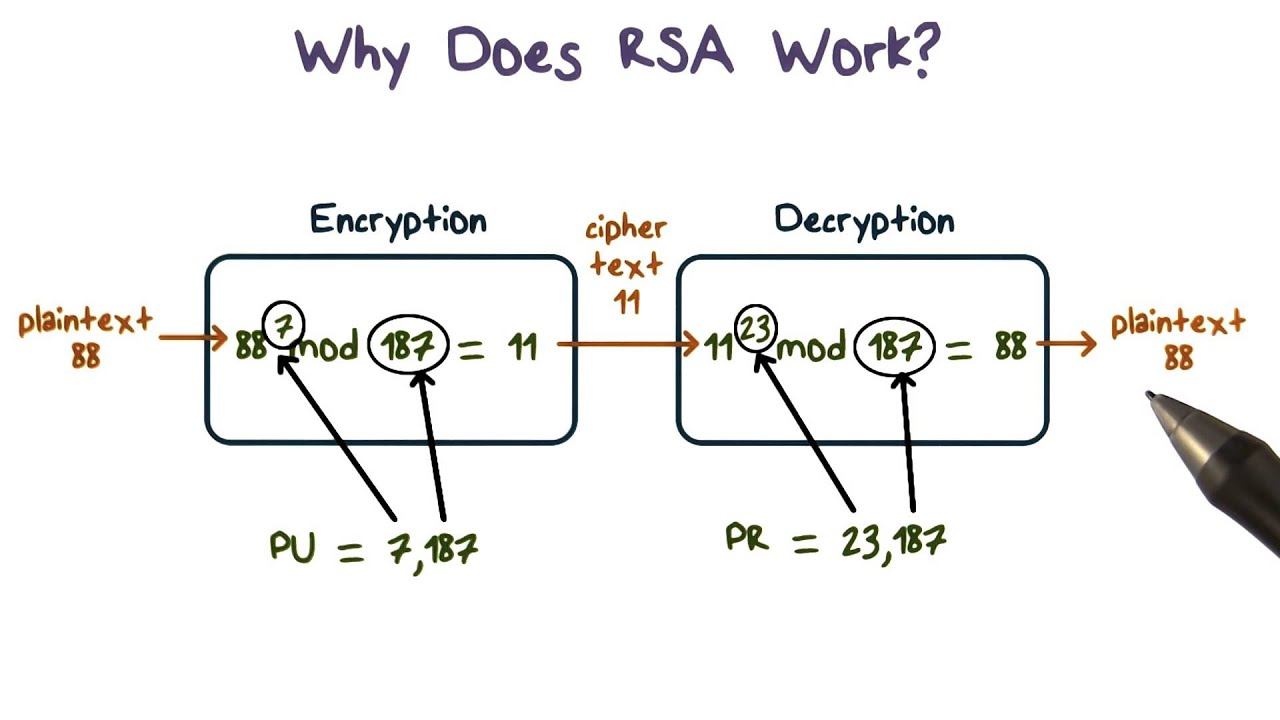

In [ ]:
# Verify Here
plaintext = 88
cipher = pow(plaintext,e_dec,M_T)
decrypt = pow(cipher, d, M_T)
if decrypt == plaintext: print ("Congrat! The plaintext is",decrypt)
else: print("Try again")


Congrat! The plaintext is 88


In [ ]:
#Compat Version
n = M_T

p1 = prime1
p2 = prime2

phi = (p1 - 1)*(p2 - 1)
d = number.inverse(e_dec, phi)

print(d)

9706291382109131554697944229183178842304288208907733505699385762053420311121733513461587249007271561966702566489339458834472191626306550261675852461131360568563516408282315215453406217621577976657843029309423739566380472313202421889358711400103717211401866708209021887282005393840550127513948223462697145513


References:
1. https://www.cryptool.org/en/cto/highlights/rsa-step-by-step
2. https://bryceknowhow.blogspot.com/2018/05/cryptography-rsa-private-key-public-key.html
3. https://hackmd.io/@Koios1143/2020ISIP/%2F%40Koios1143%2FHJdXqDLev#YANG_RSA-1